In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ds = Dataset('test.nc', 'w', format='NETCDF4_CLASSIC')
arr = np.zeros((1, 720,1440), dtype=float)
arr[0,360,720] = 10.0

ds.createDimension('lat', 720)
ds.createDimension('lon', 1440)
ds.createDimension('time',1)

var = ds.createVariable('UGOS', float, ('time', 'lat', 'lon'))
var[:,:,:] = arr

ds.close()


In [44]:
lon = np.radians(np.arange(0.125,360,0.25))
lat = np.radians(np.arange(-89.875,90,0.25))

dlambda = np.radians(0.25)
dphi = np.radians(0.25)

LON, LAT = np.meshgrid(lon, lat)
R = 6378100

DX = R*np.cos(LAT)*dlambda
DY = np.array(len(lat)*[len(lon)*[R*dphi]], dtype=float)

In [45]:
X = R*(lon-lon[720])/1e3
Y = R*(lat-lat[360])/1e3

In [46]:
ds=Dataset('test.nc_1000._Filtered.nc')
u = np.array(ds.variables['UVEL'])

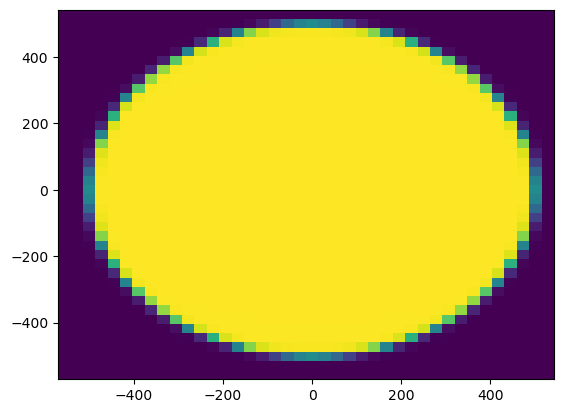

In [48]:
x1, x2= 700, 740
y1, y2 = 340, 380
plt.pcolormesh(X[x1:x2], Y[y1:y2], u[y1:y2,x1:x2])